In [36]:
# Retina quality plots
%config InlineBackend.figure_format = 'retina'

In [37]:
DATA_DIR = '../../data/reduced/small/'

In [38]:
import pandas as pd

train_data = pd.read_csv(DATA_DIR + 'PCA_train.csv')

train_data.info()
train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35187 entries, 0 to 35186
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   0         35187 non-null  float64
 1   1         35187 non-null  float64
 2   phishing  35187 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 824.8 KB


,0,1,phishing
0,228987.058114,-7577.447893,1
1,-18079.501237,-4591.866489,1
2,-7855.407037,-4726.854052,1
3,229855.757883,5730.655682,1
4,-19920.590656,-4432.011638,0


In [39]:
valid_data = pd.read_csv(DATA_DIR + 'PCA_valid.csv')

valid_data.info()
valid_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11729 entries, 0 to 11728
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   0         11729 non-null  float64
 1   1         11729 non-null  float64
 2   phishing  11729 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 275.0 KB


,0,1,phishing
0,-19913.487308,-4573.678818,1
1,-18080.461643,-4663.846316,0
2,-19152.980778,-1755.291659,0
3,13510.492490,6797.767366,1
4,-4298.720730,-1475.949864,0


In [40]:
test_data = pd.read_csv(DATA_DIR + 'PCA_test.csv')

test_data.info()
test_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11729 entries, 0 to 11728
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   0         11729 non-null  float64
 1   1         11729 non-null  float64
 2   phishing  11729 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 275.0 KB


,0,1,phishing
0,18815.156711,-1661.175732,1
1,-33252.125551,-4689.002127,1
2,-14168.852892,-2852.311369,0
3,-16619.548133,16682.891987,1
4,21832.273241,1944.771778,0


In [41]:
TARGET_COL_NAME = 'phishing'

In [42]:
X_train = train_data.drop(TARGET_COL_NAME, axis=1)
y_train = train_data[TARGET_COL_NAME]

In [43]:
y_train.value_counts()

1    18388
0    16799
Name: phishing, dtype: int64

In [44]:
X_valid = valid_data.drop(TARGET_COL_NAME, axis=1)
y_valid = valid_data[TARGET_COL_NAME]

In [45]:
y_valid.value_counts()

1    6129
0    5600
Name: phishing, dtype: int64

In [46]:
X_test = test_data.drop(TARGET_COL_NAME, axis=1)
y_test = test_data[TARGET_COL_NAME]

In [47]:
y_test.value_counts()

1    6130
0    5599
Name: phishing, dtype: int64

## Hyperparameter tuning

In [48]:
from sklearn import svm
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score

# Grid search over hyperparameters
kernel = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
clf = svm.SVC(gamma='scale')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_valid)

print('Validation data - Accuracy: {:.3f}, Balanced accuracy: {:.3f}, F1: {:.3f}, Precision: {:.3f}, Recall: {:.3f}'
      .format(accuracy_score(y_valid, y_pred),
              balanced_accuracy_score(y_valid, y_pred),
              f1_score(y_valid, y_pred),
              precision_score(y_valid, y_pred),
              recall_score(y_valid, y_pred)))
print('-' * 20)

# for k in kernel:
#     print('Kernel is {}'.format(k))

#     clf = svm.SVC(kernel=k)
#     clf.fit(X_train, y_train)

#     y_pred = clf.predict(X_valid)

#     print('Validation data - Accuracy: {:.3f}, Balanced accuracy: {:.3f}, F1: {:.3f}, Precision: {:.3f}, Recall: {:.3f}'
#           .format(accuracy_score(y_valid, y_pred),
#                   balanced_accuracy_score(y_valid, y_pred),
#                   f1_score(y_valid, y_pred),
#                   precision_score(y_valid, y_pred),
#                   recall_score(y_valid, y_pred)))
#     print('-' * 20)

Validation data - Accuracy: 0.599, Balanced accuracy: 0.598, F1: 0.618, Precision: 0.616, Recall: 0.619
--------------------


In [49]:
from joblib import dump

dump(clf, "../../models/SVM_PCA_small.pkl") 

['../../models/SVM_PCA_small.pkl']

In [50]:
from sklearn.metrics import matthews_corrcoef, roc_curve

def fpr(y_true, y_pred, sample_weight=None):
    return roc_curve(y_true, y_pred, sample_weight=sample_weight)[0][1]

METRICS = [
    ('F1', f1_score),
    ('Accuracy', accuracy_score),
    ('Balanced accuracy', balanced_accuracy_score),
    ('MCC', matthews_corrcoef),
    ('Precision', precision_score),
    ('Recall', recall_score),
    ('FPR', fpr)
]

In [51]:
y_pred = clf.predict(X_test)

Metric values:

F1: 0.619
Accuracy: 0.603
Balanced accuracy: 0.602
MCC: 0.204
Precision: 0.621
Recall: 0.618
FPR: 0.414




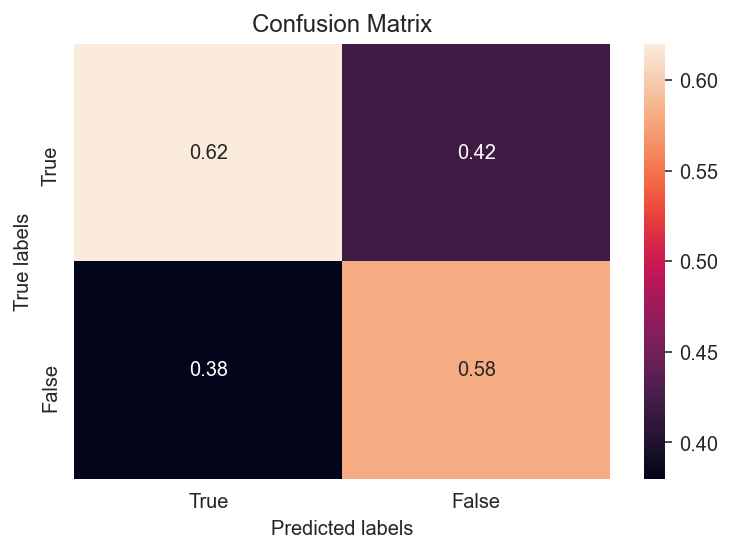

In [52]:
from bin.evaluation.evaluation import evaluate_classifier

evaluate_classifier(y_test, y_pred, y_pred, METRICS)

###### 